# Data Preprocessing

### Import relevant libraries

In [48]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

### Import and build news data

In [2]:
news_data = pd.read_csv('Input/BR_News.txt', names = ['Date', 'News'], index_col = 0) #Original raw data file

In [3]:
news_data1 = pd.read_csv('Input/Dawn_News.txt', names = ['Date', 'News'], index_col = 0) #Original raw data file

In [4]:
news_data['Sentiment'] = [0 for i in range(len(news_data))] #Initialize polarities to zero

In [5]:
news_data1['Sentiment'] = [0 for i in range(len(news_data1))] #Initialize polarities to zero

In [6]:
news_data.drop_duplicates(subset ="News", 
                     keep = False, inplace = True) 
  

In [7]:
news_data1.drop_duplicates(subset ="News", 
                     keep = False, inplace = True) 
  

In [8]:
news_data = news_data.iloc[1:]
news_data.head()

,Date,News,Sentiment
0.0,2011-04-02,Political parties should work for resolution o...,0
1.0,2011-04-05,"China to invest in hydel, renewable energy pow...",0
2.0,2011-04-06,Govt mulling to empower eight public sector en...,0
3.0,2011-04-06,"China offers financial, technical assistance f...",0
4.0,2011-04-06,Shipping activity at Port Qasim - KARACHI: Shi...,0


In [9]:
news_data1 = news_data1.iloc[1:]
news_data1.head()

,Date,News,Sentiment
0.0,2011-04-01,Judgment on judges` extension case suspended,0
1.0,2011-04-01,Gilani hints at giving subsidy on oil prices,0
2.0,2011-04-01,Agencies averse to aerial survey by foreigners,0
3.0,2011-04-01,SC gives PPP leaders time to file reply in con...,0
4.0,2011-04-01,"Quake measuring 5.2 rattles Islamabad, Mansehra",0


In [10]:
news_data['Date'] = pd.to_datetime(news_data['Date']) #Convert to datetime
news_data['Date'] = news_data["Date"].dt.strftime("%d %m %Y") #Format date
news_data['News'].map(str) #Convert news to string

0.0        Political parties should work for resolution o...
1.0        China to invest in hydel, renewable energy pow...
2.0        Govt mulling to empower eight public sector en...
3.0        China offers financial, technical assistance f...
4.0        Shipping activity at Port Qasim - KARACHI: Shi...
                                 ...                        
66711.0    Karachi to experience heatwave from May 16: PM...
66712.0    Pakistan, Saudi Arabia agree to continue close...
66713.0    Pakistan records 1531 COVID-19 cases in a sing...
66714.0    Sindh govt stops fresh Sinopharm vaccinations ...
66715.0    Qureshi contacts Palestinian FM, reiterates Pa...
Name: News, Length: 65701, dtype: object

In [11]:
news_data1['Date'] = pd.to_datetime(news_data1['Date']) #Convert to datetime
news_data1['Date'] = news_data1["Date"].dt.strftime("%d %m %Y") #Format date
news_data1['News'].map(str) #Convert news to string

0.0             Judgment on judges` extension case suspended
1.0             Gilani hints at giving subsidy on oil prices
2.0           Agencies averse to aerial survey by foreigners
3.0        SC gives PPP leaders time to file reply in con...
4.0          Quake measuring 5.2 rattles Islamabad, Mansehra
                                 ...                        
50928.0    Met dept predicts rainfall, gusty winds in par...
50929.0    Darya Kay Iss Paar highlights the youth suicid...
50930.0    Ali Suhail’s new album White Flag satisfies a ...
50931.0    Demeaning the country's ambassadors cannot but...
50932.0    Editorial: Pakistan's Test victories over Zimb...
Name: News, Length: 46465, dtype: object

In [12]:
news_data1.drop_duplicates(subset = 'News', keep = False, inplace = True)


In [13]:
news_data.reset_index(drop = True, inplace = True)

In [14]:
news_data1.reset_index(drop = True, inplace = True)

### Import and stock prices as daily difference

In [15]:
diff = pd.read_csv('Input/Difference/ABOT PA Equity.csv')

In [16]:
diff.describe()

,Open,High,Low,Close,Volume
count,5303.000000,5303.000000,5303.000000,5303.000000,5303.000000
mean,0.142257,0.144705,0.142257,0.144649,4.307185
std,1927.356517,19407.021655,179.640908,16.203905,61760.959098
min,-99235.000000,-999231.000000,-9240.000000,-770.830000,-925733.000000
25%,-0.807200,-0.856450,-0.705900,-0.789800,-3600.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.899700,0.903950,0.839900,0.802300,3318.000000
max,99234.000000,999221.000000,9243.900000,761.550000,918700.000000


In [17]:
diff['Date'] = pd.to_datetime(diff['Date']) #Convert date to datetime

In [18]:
diff.head()

,Open,High,Low,Close,Volume,Date
0,0.0,0.0,0.0,0.0,0.0,2001-01-03
1,0.0,0.0,0.0,0.0,0.0,2001-01-04
2,0.0,0.0,0.0,0.0,0.0,2001-01-05
3,0.0,0.0,0.0,0.0,0.0,2001-01-08
4,0.0,0.0,0.0,0.0,0.0,2001-01-09


In [19]:
diff.tail()

,Open,High,Low,Close,Volume,Date
5298,-9.99,-9.99,-4.00,-1.55,-21900.0,2021-04-29
5299,1.00,0.00,-5.99,0.14,-4250.0,2021-04-30
5300,-10.76,0.00,0.00,-2.45,5200.0,2021-05-03
5301,15.95,15.00,14.99,11.61,4650.0,2021-05-04
5302,5.82,0.00,7.02,6.89,8000.0,2021-05-05


In [20]:
diff.describe()

,Open,High,Low,Close,Volume
count,5303.000000,5303.000000,5303.000000,5303.000000,5303.000000
mean,0.142257,0.144705,0.142257,0.144649,4.307185
std,1927.356517,19407.021655,179.640908,16.203905,61760.959098
min,-99235.000000,-999231.000000,-9240.000000,-770.830000,-925733.000000
25%,-0.807200,-0.856450,-0.705900,-0.789800,-3600.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.899700,0.903950,0.839900,0.802300,3318.000000
max,99234.000000,999221.000000,9243.900000,761.550000,918700.000000


### Make relevant functions to map polarities and take into account weekends

In [21]:
def pol(val, mean, std):
    #print(val)
    if val >= (mean + std)*0.3:
        
        return 1
    
    elif val < (mean-std)*0.3:
        
        return -1
    
    else:
        
        return 0

# Year, month, day	
def check(x):
    d3 = datetime.datetime.strptime(x, '%d %m %Y')
    d2 = datetime.datetime.strptime(x, '%d %m %Y').weekday()
   # print(d3)
    ##print(d2)

    if (d2 == 5):
        d1 = d3 - datetime.timedelta(days = 1)
    elif (d2 == 6):
        d1 = d3 - datetime.timedelta(days = 2)
    else:
        d1 = d3
    #print(d1)    
    return d1


check('08 02 2009')

datetime.datetime(2009, 2, 6, 0, 0)

In [22]:
news_data.head()


,Date,News,Sentiment
0,02 04 2011,Political parties should work for resolution o...,0
1,05 04 2011,"China to invest in hydel, renewable energy pow...",0
2,06 04 2011,Govt mulling to empower eight public sector en...,0
3,06 04 2011,"China offers financial, technical assistance f...",0
4,06 04 2011,Shipping activity at Port Qasim - KARACHI: Shi...,0


In [23]:
news_data1.head()


,Date,News,Sentiment
0,01 04 2011,Judgment on judges` extension case suspended,0
1,01 04 2011,Gilani hints at giving subsidy on oil prices,0
2,01 04 2011,Agencies averse to aerial survey by foreigners,0
3,01 04 2011,SC gives PPP leaders time to file reply in con...,0
4,01 04 2011,"Quake measuring 5.2 rattles Islamabad, Mansehra",0


In [24]:
x = len(news_data)
print(x)

65701


In [25]:
print(len(diff))


5303


In [26]:
news_data = news_data.append(news_data1, ignore_index=True)

In [27]:
len(news_data)

112166

In [28]:
news_data['News'] = news_data['News'].astype(str)


In [29]:
news_data.head(10)

,Date,News,Sentiment
0,02 04 2011,Political parties should work for resolution o...,0
1,05 04 2011,"China to invest in hydel, renewable energy pow...",0
2,06 04 2011,Govt mulling to empower eight public sector en...,0
3,06 04 2011,"China offers financial, technical assistance f...",0
4,06 04 2011,Shipping activity at Port Qasim - KARACHI: Shi...,0
5,06 04 2011,Rupee gains vs dollar on healthy inflows; stoc...,0
6,06 04 2011,A stable Pakistan is beneficial for Afghanista...,0
7,06 04 2011,Britain can play major role in improving educa...,0
8,07 04 2011,"Gold eases at Rs 39,600 after touching record ...",0
9,07 04 2011,"Saud, Khurram Shahzad released on bail - ISLAM...",0


### Label data with sentiment

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [31]:
vader = SentimentIntensityAnalyzer()
scores = news_data['News'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
news_data = news_data.join(scores_df, rsuffix='_right')

In [32]:
news_data.head(25)

,Date,News,Sentiment,neg,neu,pos,compound
0,02 04 2011,Political parties should work for resolution o...,0,0.000,0.716,0.284,0.8519
1,05 04 2011,"China to invest in hydel, renewable energy pow...",0,0.000,0.754,0.246,0.7579
2,06 04 2011,Govt mulling to empower eight public sector en...,0,0.000,0.920,0.080,0.2500
3,06 04 2011,"China offers financial, technical assistance f...",0,0.000,0.923,0.077,0.2732
4,06 04 2011,Shipping activity at Port Qasim - KARACHI: Shi...,0,0.000,0.895,0.105,0.4019
5,06 04 2011,Rupee gains vs dollar on healthy inflows; stoc...,0,0.046,0.798,0.156,0.5574
6,06 04 2011,A stable Pakistan is beneficial for Afghanista...,0,0.000,0.689,0.311,0.8176
7,06 04 2011,Britain can play major role in improving educa...,0,0.000,0.661,0.339,0.8689
8,07 04 2011,"Gold eases at Rs 39,600 after touching record ...",0,0.000,0.924,0.076,0.3182
9,07 04 2011,"Saud, Khurram Shahzad released on bail - ISLAM...",0,0.239,0.761,0.000,-0.7650


In [ ]:
for i in range(len(news_data)):
    
    if news_data['compound'][i] > 0.3:
        
        news_data['Sentiment'][i] = 1
        
    elif news_data['compound'][i] >= -0.3 and news_data['compound'][i] <= 0.3:
        
        news_data['Sentiment'][i] = 0
        
    if news_data['compound'][i] < -0.3:
        
        news_data['Sentiment'][i] = -1

In [ ]:
import datetime
for i in range(len(diff)):
    t = diff['Date'][i]
    t = t.date()
    t = t.strftime("%d %m %Y")
    diff['Date'][i] = t
news_data.describe()

### Label data with polarity for all companies

In [72]:
def labeling(diff, news_data):

    news_data['Polarity'] = [0 for i in range(len(news_data))] #Initialize polarities to zero
    news_data['Cum'] = [0 for i in range(len(news_data))] #Initialize polarities to zero

    mean = diff['Open'].mean()
    std = diff['Open'].std()
    
    dates = diff['Date'].tolist()
    for x in range(len(dates)):
        dates[x] = check(dates[x])
    
    
    for i in range(len(news_data)):
        
        
        date = check(news_data['Date'][i])
        
        for j in range(len(dates)):
            
            if dates[j] == date:
                
                
                
                index = j
                
                if (index <= len(diff)):
                    #print(diff['Open'][index], (mean+std)*0.3, (mean-std)*0.3)
                    polarity = pol(float(diff['Open'][index]), mean, std)
                    #print(polarity)
                    #print(polarity)

                    news_data['Polarity'][i] = polarity
            
                break
        
            
    for i in range(len(news_data1)):
    
        if news_data['Polarity'][i] == news_data['Sentiment'][i]:
            
            #print('flag')
            #print(news_data1['Polarity'][i])
            news_data['Cum'][i] = news_data['Polarity'][i]
                
    #news_data = news_data[news_data['Cum'] != -2]

            
    return news_data



'def labeling(diff, news_data):\n    \n    news_data[\'Polarity\'] = news_data[\'Sentiment\']\n    news_data[\'Cum\'] = news_data[\'Sentiment\']\n    \n    return news_data\n    \n    \ndiff[\'Date\'] = pd.to_datetime(diff[\'Date\']) #Convert to datetime\ndiff[\'Date\'] = diff["Date"].dt.strftime("%d %m %Y") #Format date\n\nvar = labeling(diff, news_data)'

In [61]:
var.describe()

,Sentiment,neg,neu,pos,compound,Polarity,Cum
count,112166.000000,112166.000000,112166.000000,112166.000000,112166.000000,112166.000000,112166.000000
mean,0.000713,0.088132,0.834153,0.077714,0.010711,0.000713,0.000713
std,0.817747,0.142143,0.160846,0.109724,0.445410,0.817747,0.817747
min,-1.000000,0.000000,0.000000,0.000000,-0.986600,-1.000000,-1.000000
25%,-1.000000,0.000000,0.735000,0.000000,-0.296000,-1.000000,-1.000000
50%,0.000000,0.000000,0.859000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.144000,1.000000,0.134000,0.361200,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.857000,0.989700,1.000000,1.000000


In [75]:
KSE100 = pd.read_csv('Input/KSE100.csv')

for i in range(len(KSE100)):
    
    name = KSE100['Ticker'][i]
    print(name)
    load_name = 'Input/Difference/' + name +'.csv'
    
    diff = pd.read_csv(load_name)
    
    diff['Date'] = pd.to_datetime(diff['Date']) #Convert to datetime
    diff['Date'] = diff["Date"].dt.strftime("%d %m %Y") #Format date
    
    #data = labeling(diff, news_data)
    
    arr = [-1, 0, 1]
    prob = [0.3, 0.5, 0.2]
    news_data['Polarity'] = np.random.choice(arr, news_data.shape[0], p = prob)
    news_data['Cum'] = news_data['Polarity']
    news_data['Sentiment'] = news_data['Polarity']
    
    
    save_name = 'Input/Cleaned Data/' + name + '.csv'
    
    news_data.to_csv(path_or_buf = save_name, index = False) #Save dataframe as CSV

HBL PA Equity
UBL PA Equity
HUBC PA Equity
MCB PA Equity
OGDC PA Equity
LUCK PA Equity
ENGRO PA Equity
PPL PA Equity
FFC PA Equity
PSO PA Equity
DAWH PA Equity
DGKC PA Equity
POL PA Equity
EFERT PA Equity
KAPCO PA Equity
NBP PA Equity
NESTLE PA Equity
SEARL PA Equity
BAHL PA Equity
FCCL PA Equity
MLCF PA Equity
KEL PA Equity
PSEL PA Equity
PIBTL PA Equity
PKGS PA Equity
NML PA Equity
BAFL PA Equity
MARI PA Equity
PAEL PA Equity
FFBL PA Equity
KTML PA Equity
ABOT PA Equity
ABL PA Equity
TRG PA Equity
EFUG PA Equity
FCEPL PA Equity
INDU PA Equity
NRL PA Equity
MUREB PA Equity
FATIMA PA Equity
HCAR PA Equity
NATF PA Equity
HASCOL PA Equity
PIOC PA Equity
HMB PA Equity
PAKT PA Equity
JDWS PA Equity
CHCC PA Equity
KOHC PA Equity
AICL PA Equity
MTL PA Equity
GLAXO PA Equity
THALL PA Equity
ATRL PA Equity
PSMC PA Equity
APL PA Equity
FEROZ PA Equity
NCPL PA Equity
PTC PA Equity
SNGP PA Equity
ISL PA Equity
NPL PA Equity
SSGC PA Equity
IGIHL PA Equity
JLICL PA Equity
ICI PA Equity
SHEL PA Equi

In [62]:
data = pd.read_csv('Input/Cleaned Data/ABOT PA Equity.csv')

In [63]:
data.head()

,Date,News,Sentiment,neg,neu,pos,compound,Polarity,Cum
0,02 04 2011,Political parties should work for resolution o...,0,0.0,0.716,0.284,0.8519,0,0
1,05 04 2011,"China to invest in hydel, renewable energy pow...",1,0.0,0.754,0.246,0.7579,1,1
2,06 04 2011,Govt mulling to empower eight public sector en...,0,0.0,0.920,0.080,0.2500,0,0
3,06 04 2011,"China offers financial, technical assistance f...",1,0.0,0.923,0.077,0.2732,1,1
4,06 04 2011,Shipping activity at Port Qasim - KARACHI: Shi...,-1,0.0,0.895,0.105,0.4019,-1,-1


Text(0.5, 1.0, 'Sentiment Data Distribution')

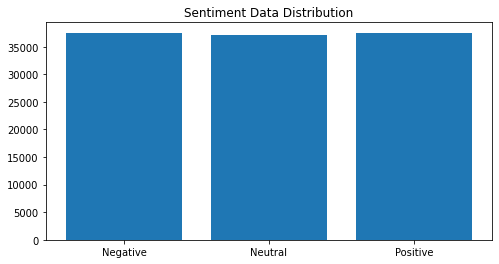

In [64]:
plt.figure(figsize=(8,4))
count_pos = news_data['Cum'].value_counts()[1]
count_ntl = news_data['Cum'].value_counts()[0]
count_neg = news_data['Cum'].value_counts()[-1]

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")